<a href="https://colab.research.google.com/github/SejalJadhav1/python_/blob/main/MachineLearningPractice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Linear Regression
# 1. Dataset: California housing
# 2. Linear regression API: LinearRegression
# 3. Training: fit(normal equation) and cross_validate(normal equation with cross validation)
# 4. evaluation: score (r2 score) and cross_val_score with different scoring parameters

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(306)
plt.style.use("seaborn")

In [ ]:
shuffle_cv = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 0)


In [ ]:
#LOAD DATASET

In [ ]:
x , y = fetch_california_housing(as_frame = True , return_X_y = True)


In [ ]:
# Train test split

In [ ]:
# one fold splitting 
train_x, test_x, train_y , test_y = train_test_split(x , y , random_state = 42)

In [ ]:
print(train_x.shape)
print(test_x.shape)

(15480, 8)
(5160, 8)


In [ ]:
#pipeline: preprocessing + model

In [ ]:
lin_pipeline = Pipeline([
    ("sclaing" , StandardScaler()),
    ("regressor" , LinearRegression())
])
lin_pipeline.fit(train_x , train_y) # training linear regression model with normal eqn

Pipeline(steps=[('sclaing', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
lin_pipeline[-1].intercept_

2.0703489205426377

In [ ]:
lin_pipeline["regressor"].intercept_ 

2.0703489205426377

In [ ]:
lin_pipeline["regressor"].coef_ 

array([ 0.85210815,  0.12065533, -0.30210555,  0.34860575, -0.00164465,
       -0.04116356, -0.89314697, -0.86784046])

In [ ]:
# Model Evaluation
# 1. estimation of model performance as provided by the test error
# 2. comparison of errors for model diagnostic purpose(under/over/just right fit)


In [ ]:
test_score = lin_pipeline.score(test_x , test_y)
print("test_score",test_score)
train_score = lin_pipeline.score(train_x , train_y)
print("train_score" , train_score)
# the score method return r2 score whose best value is 1. 
# the test and train scores are comparable but not high which indicates underfitting

test_score 0.5910509795491352
train_score 0.609873031052925


In [ ]:
#since the score was calculated on one fold data the results weren't that good
# lets use k folds now

In [ ]:
lin_cv_score = cross_val_score(lin_pipeline , train_x , train_y, 
                               scoring = "neg_mean_squared_error" , 
                               cv = shuffle_cv)  
print(lin_cv_score)
# lets take mean and std of the scores 
print("score_mean" , lin_cv_score.mean())
print("score_std" , lin_cv_score.std()) 

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]
score_mean -0.5287517875396764
score_std 0.022232904569798703


In [ ]:
print(-lin_cv_score) # calculating error my negifying score which will give us MSE
# lets take mean and std of the scores 
print("score_mean" , -lin_cv_score.mean())
print("score_std" , -lin_cv_score.std()) 

[0.50009976 0.52183352 0.55931218 0.52110499 0.56059203 0.50510767
 0.52386194 0.54775518 0.5007161  0.54713448]
score_mean 0.5287517875396764
score_std -0.022232904569798703


In [ ]:
lin_cvalidate_score = cross_validate(lin_pipeline, 
                                     train_x , train_y,
                                     cv = shuffle_cv , 
                                     scoring = "neg_mean_squared_error" , 
                                     return_train_score = True,
                                     return_estimator = True)

In [ ]:
lin_cvalidate_score

{'fit_time': array([0.00747132, 0.00693917, 0.00719118, 0.00808787, 0.00751829,
        0.00791907, 0.00744843, 0.00766683, 0.00753498, 0.0077641 ]),
 'score_time': array([0.00170493, 0.00163364, 0.0016942 , 0.00185823, 0.00181079,
        0.00181961, 0.00186801, 0.00193858, 0.00186443, 0.00176525]),
 'estimator': [Pipeline(steps=[('sclaing', StandardScaler()),
                  ('regressor', LinearRegression())]),
  Pipeline(steps=[('sclaing', StandardScaler()),
                  ('regressor', LinearRegression())]),
  Pipeline(steps=[('sclaing', StandardScaler()),
                  ('regressor', LinearRegression())]),
  Pipeline(steps=[('sclaing', StandardScaler()),
                  ('regressor', LinearRegression())]),
  Pipeline(steps=[('sclaing', StandardScaler()),
                  ('regressor', LinearRegression())]),
  Pipeline(steps=[('sclaing', StandardScaler()),
                  ('regressor', LinearRegression())]),
  Pipeline(steps=[('sclaing', StandardScaler()),
            

In [ ]:
train_error = -1 * lin_cvalidate_score["train_score"]
test_error = -1 * lin_cvalidate_score["test_score"]

print("train_error_mean" , train_error.mean())
print("train_error_std" ,train_error.std())
print("test_error_mean" , test_error.mean())
print("test_error_std" , test_error.std())
# the train and test errors are high indicating underfitting.
# test error has higher variability across different folds 
#compared to the train error indicated by higher std of test_error

train_error_mean 0.5186840759388985
train_error_std 0.005552249067390945
test_error_mean 0.5287517875396764
test_error_std 0.022232904569798703


In [ ]:
#Let's understand how the training set size or #samples affect the error.

#We can use Learning_curve API that calculates cross 
#validation scores for different
#samples as specified in argument train_sizes.

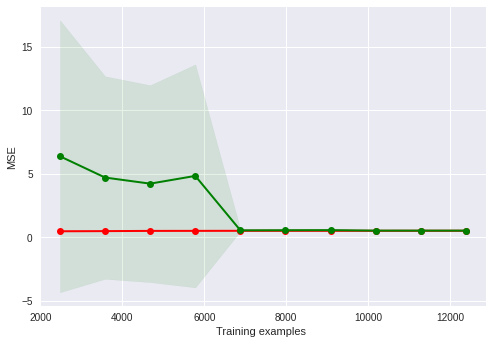

In [ ]:
def plot_learning_curve(train_sizes, train_scores, test_scores):
    train_score_mean = np.mean(-train_scores, axis=1)
    train_score_std = np.std(-train_scores, axis=1)

    test_score_mean = np.mean(-test_scores, axis=1)
    test_score_std = np.std(-test_scores, axis=1)
    
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    plt.fill_between(train_sizes,
                    train_score_mean - train_score_std,
                    train_score_mean + train_score_std,
                    alpha=0.1,
                    color='r',)

    plt.fill_between(train_sizes,
                    test_score_mean + test_score_std,
                    test_score_mean - test_score_std,
                    alpha=0.1,
                    color='g')

    plt.plot(train_sizes, train_score_mean, "o-", color='r', lw=2)
    plt.plot(train_sizes, test_score_mean, "o-", color='g', lw=2)

    plt.xlabel("Training examples ")
    plt.ylabel("MSE")
    # plt.legend(loc="best")

    return plt.show()
(train_sizes, train_scores, test_scores, fit_times, score_times) = learning_curve(lin_pipeline, train_x, train_y, cv=shuffle_cv,scoring='neg_mean_squared_error', n_jobs=-1,
return_times=True, train_sizes=np.linspace(0.2, 1, 10))
plot_learning_curve(train_sizes, train_scores, test_scores)

In [ ]:
# as the no. of training egs grow the time to fit also increases

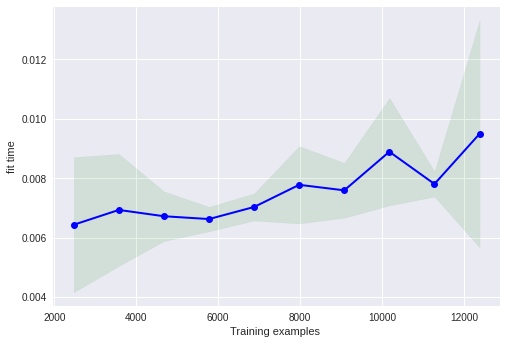

In [ ]:

#@ title [Plot Scalability curves]
def plot_scalability_curve(train_sizes, fit_times):
    train_score_mean = np.mean(-train_scores, axis=1)
    train_score_std = np.std(-train_scores, axis=1)

    test_score_mean = np.mean(-test_scores, axis=1)
    test_score_std = np.std(-test_scores, axis=1)

    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    plt.fill_between(train_sizes,
                    fit_times_mean - fit_times_std,
                    fit_times_mean + fit_times_std,
                    alpha=0.1,
                    color='g',)

    plt.plot(train_sizes, fit_times_mean, "o-", color='b', lw=2)

    plt.xlabel("Training examples ")
    plt.ylabel("fit time")
    # plt.legend(loc="best")
    
    return plt.show()
plot_scalability_curve(train_sizes , fit_times)

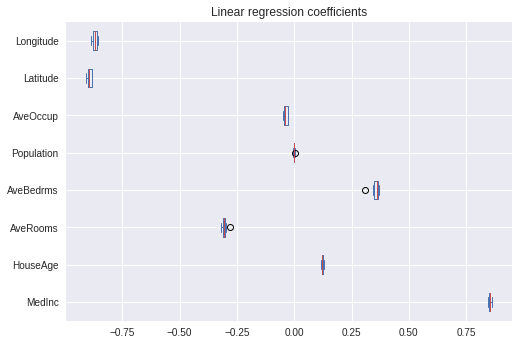

In [ ]:
coefs = [i[-1].coef_ for i in lin_cvalidate_score["estimator"]]
weights_df = pd.DataFrame(coefs , columns = x.columns) 
# weight vectors

weights_df.plot.box(vert = False)
_ = plt.title("Linear regression coefficients")

In [ ]:
coefs

[array([ 8.44324888e-01,  1.18463901e-01, -3.04619574e-01,  3.56620503e-01,
         1.74458509e-04, -4.23964612e-02, -8.96045642e-01, -8.68906479e-01]),
 array([ 0.85871421,  0.12258718, -0.31897149,  0.36795169, -0.00578729,
        -0.04758437, -0.88188417, -0.86093191]),
 array([ 0.86165883,  0.12395293, -0.31137495,  0.36412006, -0.00218047,
        -0.04227803, -0.88380608, -0.85784439]),
 array([ 0.84812671,  0.12604271, -0.31178208,  0.36576675, -0.00192487,
        -0.04237108, -0.89469432, -0.87035635]),
 array([ 0.85110471,  0.11974124, -0.29617491,  0.34493816, -0.00558428,
        -0.02633099, -0.906398  , -0.87948924]),
 array([ 0.85337804,  0.12800277, -0.30269085,  0.34946488,  0.00133416,
        -0.02710009, -0.88444928, -0.85853646]),
 array([ 0.85204472,  0.12059626, -0.30697095,  0.36365776, -0.00194586,
        -0.02837277, -0.90805791, -0.88420571]),
 array([ 0.85350377,  0.13056006, -0.27842636,  0.30747418,  0.00529665,
        -0.04435202, -0.88370391, -0.8656

In [ ]:
weights_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.844325,0.118464,-0.304620,0.356621,0.000174,-0.042396,-0.896046,-0.868906
1,0.858714,0.122587,-0.318971,0.367952,-0.005787,-0.047584,-0.881884,-0.860932
2,0.861659,0.123953,-0.311375,0.364120,-0.002180,-0.042278,-0.883806,-0.857844
3,0.848127,0.126043,-0.311782,0.365767,-0.001925,-0.042371,-0.894694,-0.870356
4,0.851105,0.119741,-0.296175,0.344938,-0.005584,-0.026331,-0.906398,-0.879489
5,0.853378,0.128003,-0.302691,0.349465,0.001334,-0.027100,-0.884449,-0.858536
6,0.852045,0.120596,-0.306971,0.363658,-0.001946,-0.028373,-0.908058,-0.884206
7,0.853504,0.130560,-0.278426,0.307474,0.005297,-0.044352,-0.883704,-0.865643
8,0.843517,0.117394,-0.308985,0.364822,-0.002337,-0.027292,-0.902287,-0.877274
9,0.855156,0.120356,-0.303848,0.350465,-0.002805,-0.042516,-0.898783,-0.874346


In [ ]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


In [ ]:
# selecting best model
best_model_index = np.argmin(test_error)
selected_model = lin_cvalidate_score["estimator"][best_model_index]

In [ ]:
 lin_cvalidate_score["estimator"][0]

Pipeline(steps=[('sclaing', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
best_model_index = np.argmin(test_error)
test_error

array([0.50009976, 0.52183352, 0.55931218, 0.52110499, 0.56059203,
       0.50510767, 0.52386194, 0.54775518, 0.5007161 , 0.54713448])

In [ ]:
# examine selected model coeff
selected_model["regressor"].coef_

array([ 8.44324888e-01,  1.18463901e-01, -3.04619574e-01,  3.56620503e-01,
        1.74458509e-04, -4.23964612e-02, -8.96045642e-01, -8.68906479e-01])

In [ ]:
selected_model["regressor"].intercept_

2.0779898917958657

In [ ]:
#model performance 

from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(lin_pipeline , train_x , train_y)
cv_predictions

array([2.35311994, 3.13838889, 2.21849912, ..., 2.03667839, 2.84248473,
       2.26647786])

In [ ]:
train_y

8158     2.285
18368    2.799
19197    1.830
3746     4.658
13073    1.500
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 15480, dtype: float64

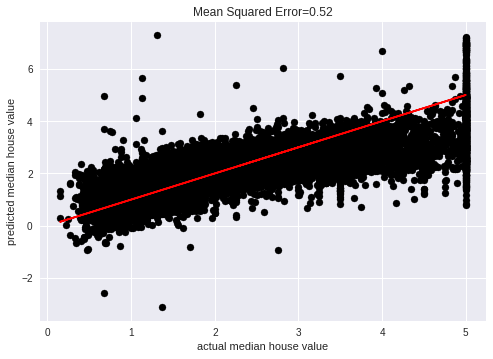

In [ ]:
from sklearn.metrics import mean_squared_error
mse_cv = mean_squared_error(train_y , cv_predictions)

plt.scatter(train_y , cv_predictions , color = "black")
plt.plot(train_y , train_y , "r-")
plt.title("Mean Squared Error=0.52" )
plt.xlabel("actual median house value")
plt.ylabel("predicted median house value")
plt.show() 

In [ ]:
mse_cv

0.524239429597702

In [ ]:
# predictions from selected cross_validates model
test_predicitons_csv = selected_model.predict(test_x)
test_predicitons_csv

array([0.73548515, 1.7725621 , 2.70011199, ..., 1.72922496, 2.34393553,
       3.5176306 ])

In [ ]:
# predictions from initially one fold splitted model
test_predictions = lin_pipeline.predict(test_x)
test_predictions

array([0.72412832, 1.76677807, 2.71151581, ..., 1.72382152, 2.34689276,
       3.52917352])

In [ ]:
# report model performance

print("R2 score for the best model obtained via cv" ,
      selected_model.score(test_x , test_y))
print("R2 score for model without cv" , lin_pipeline.score(test_x , test_y))

R2 score for the best model obtained via cv 0.5923577635319088
R2 score for model without cv 0.5910509795491352


In [ ]:
# alternative metric
print("MSE for the best model obtained via cross validation" ,
      mean_squared_error(test_y , test_predicitons_csv))
print("MSE for the best model obtained without cv" ,
      mean_squared_error(test_y , test_predictions))
# cv model performs better

MSE for the best model obtained via cross validation 0.5393995876218523
MSE for the best model obtained without cv 0.5411287478470688


In [ ]:
#BASELINE MODEL

In [ ]:
# LinearRegression classifier
# 1. Build linear regression model with feature scaling as part of a pipeline
# 2. Train the model with 10-fold cross validation via ShuffleSplit
# 3. Capture errors on different folds

In [ ]:
shuffle_cv = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state=0 )


In [ ]:
features , labels = fetch_california_housing(as_frame = True, return_X_y= True)
train_features , test_features, train_labels, test_labels = train_test_split(features, labels, random_state = 42)

In [ ]:
lin_pipeline = Pipeline([
     ("scaling" , StandardScaler()),
     ("regressor" , LinearRegression())
 ])

lin_cv_results = cross_validate(lin_pipeline , train_features,
                                train_labels , cv = shuffle_cv , 
                                scoring = "neg_mean_absolute_error" , 
                                n_jobs = 2) # n_jobs = Number of jobs to run in parallel. Training the estimator and computing
#the score are parallelized over the cross-validation splits.

lin_errors = pd.Series(-lin_cv_results["test_score"] , 
                       name = "Linear regression error")


In [ ]:
def dummy_reg_baseline(strategy, constant_val =None , quantile_val = None):
  baseline_model_median = DummyRegressor(strategy = strategy, 
                                         constant = constant_val,
                                         quantile = quantile_val)
  baseline_median_cv_results = cross_validate(baseline_model_median, 
                                              train_features, train_labels ,
                                              cv = shuffle_cv , scoring = "neg_mean_absolute_error" ,
                                              n_jobs = 2)
  return pd.Series(-baseline_median_cv_results["test_score"] ,
                   name= "Dummy regressor error")

In [ ]:
baseline_median_cv_results_errors = dummy_reg_baseline(strategy = "median")
baseline_mean_cv_results_errors = dummy_reg_baseline(strategy = "mean")
baseline_constant_cv_results_errors = dummy_reg_baseline(strategy = "constant" , constant_val = 2)
baseline_quantile_cv_results_errors = dummy_reg_baseline(strategy = "quantile" , quantile_val = 0.55)



In [ ]:
dummy_error_df = pd.concat([
    baseline_median_cv_results_errors,
    baseline_mean_cv_results_errors,
    baseline_constant_cv_results_errors,
    baseline_quantile_cv_results_errors
] , axis = 1)

dummy_error_df.columns = ["median cv" , "mean cv" , "constant cv" , "quantile cv"]


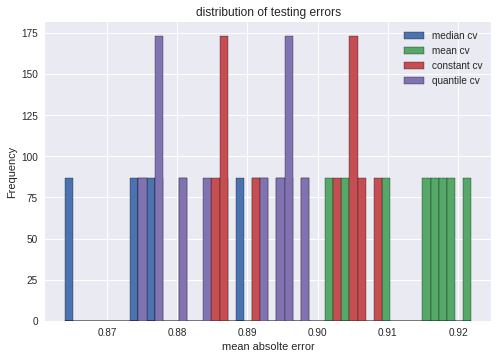

In [ ]:
dummy_error_df.plot.hist(bins = 50 , density = True, edgecolor = "black")
plt.legend(loc = "upper right")
plt.xlabel("mean absolte error")
_ = plt.title("distribution of testing errors")

In [ ]:
dummy_error_df

,median cv,mean cv,constant cv,quantile cv
0,0.881187,0.918341,0.902993,0.891847
1,0.873773,0.898484,0.886983,0.877153
2,0.876366,0.894307,0.885488,0.877260
3,0.892083,0.915112,0.904889,0.895924
4,0.876835,0.909209,0.895593,0.884722
5,0.874685,0.903733,0.890999,0.880856
6,0.864097,0.902037,0.886215,0.874646
7,0.888523,0.917216,0.904945,0.894905
8,0.890963,0.921880,0.908874,0.898323
9,0.886765,0.919369,0.905994,0.895436


In [ ]:
# permutation_test_score
# it permutes the target to generate randomized data
# and computes the empirical p-value against the null hypothesis, that
# features and targets are independent

# here we are interested in permutation_score returned by this API, which
# indicates score of the model on different permutations



In [ ]:
score, permutation_score, pvalue = permutation_test_score(
    lin_pipeline, train_features, train_labels, 
    cv = shuffle_cv , scoring = "neg_mean_absolute_error",
    n_jobs = 2, n_permutations = 30
)
permutation_errors = pd.Series(-permutation_score, name = "Permuted error")
print(permutation_score) 

[-0.91446539 -0.91608713 -0.91501122 -0.91112203 -0.91326112 -0.91428719
 -0.91694297 -0.90660687 -0.90873595 -0.91546138 -0.9084695  -0.91174023
 -0.91857102 -0.91467076 -0.90396709 -0.91239289 -0.91095499 -0.91729623
 -0.90529415 -0.91436609 -0.91993036 -0.91661883 -0.91104746 -0.91563156
 -0.91014294 -0.91526135 -0.90680247 -0.90796435 -0.91032999 -0.91545574]


In [ ]:
# model comparison 
error_df = pd.concat([lin_errors, baseline_median_cv_results_errors , permutation_errors] , axis = 1)

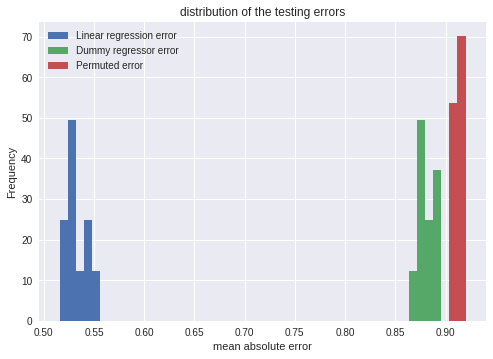

In [ ]:
error_df.plot.hist(bins = 50 , density = True)
plt.legend(loc ="best")
plt.xlabel("mean absolute error")
_ = plt.title("distribution of the testing errors")

In [ ]:
np.random.seed(306)
shuffle_cv = ShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 0)
x , y = fetch_california_housing(as_frame = True , return_X_y = True)

sgd_train_x , sgd_test_x ,sgd_train_y , sgd_test_y = train_test_split(x , y , random_state = 42)

train_x , tune_x , train_y , tune_y = train_test_split(
    sgd_train_x , sgd_train_y, random_state=42
)

In [ ]:
# baseline SGDRegressor 
# 1. instantiate a baseline SGDRegressor model with default parameters
# 2. train the model with the training feature matrix and labels
# 3. obtain score 

In [ ]:
sgd = SGDRegressor(random_state = 42)
sgd.fit(sgd_train_x ,sgd_train_y )

train_mae = mean_absolute_error(train_y , sgd.predict(train_x))
tune_mae = mean_absolute_error(tune_y , sgd.predict(tune_x))

print("train_mae" , train_mae)
print("test_mae" , tune_mae)

train_mae 288233807860278.44
test_mae 291238114737240.25


In [ ]:
#We know that, SGD is sensitive to feature scaling
sgd_pipeline = Pipeline([
    ('scaler' , StandardScaler()),
    ('sgd' , SGDRegressor())
])
sgd_pipeline.fit(train_x , train_y)

train_mae = mean_absolute_error(train_y , sgd_pipeline.predict(train_x))
dev_mae = mean_absolute_error(tune_y , sgd_pipeline.predict(tune_x))

print("train_mae" , train_mae)
print("tune_mae" , tune_mae)

train_mae 0.5135804404077051
tune_mae 291238114737240.25


In [ ]:
# the error is still high 
# instantiate SGDRegressor with warm_start = TRue and tol = -np.infty
# train SGD and record loss
# plot learning curves 


Text(0, 0.5, 'MSE')

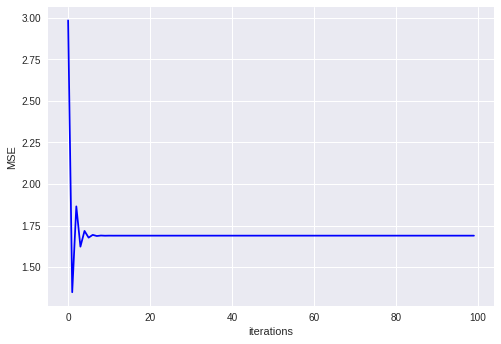

In [ ]:
eta0 = 1e-2
sgd_pipeline = Pipeline([
    ("scaling" , StandardScaler() ),
    ("regressor" , SGDRegressor(max_iter = 1 , tol = -np.infty ,
                                warm_start = True ,  eta0 = eta0,random_state = 42))
])

loss = []
for i in range(100):
  sgd_pipeline.fit(train_x , train_y)
  loss.append(mean_squared_error(train_y , sgd_pipeline.predict(train_x)))

plt.plot(np.arange(len(loss)) , loss , "b-")
plt.xlabel("iterations")
plt.ylabel("MSE")


In [ ]:
#

In [ ]:
np.arange(len(loss))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
len(loss)

100

In [ ]:
loss

[2.985324161659886,
 1.348321537150384,
 1.8654177106917478,
 1.622646457171417,
 1.7173489560497834,
 1.6769970252660107,
 1.6936620583083337,
 1.68682283841833,
 1.6897311170089724,
 1.688568943127678,
 1.6890762584143542,
 1.688879176395668,
 1.6889679218096354,
 1.6889346692200038,
 1.6889502766084852,
 1.6889447141216156,
 1.6889474811917102,
 1.688946563426944,
 1.6889470596226823,
 1.6889469115171014,
 1.6889470018757053,
 1.6889469788443985,
 1.688946995631794,
 1.6889469922824802,
 1.6889469954801664,
 1.688946995057381,
 1.6889469956847236,
 1.6889469956503993,
 1.6889469957776007,
 1.6889469957812946,
 1.6889469958079966,
 1.6889469958110335,
 1.688946995816831,
 1.6889469958179588,
 1.6889469958192411,
 1.6889469958195942,
 1.6889469958198786,
 1.6889469958199739,
 1.688946995820058,
 1.6889469958200782,
 1.6889469958201027,
 1.6889469958200993,
 1.6889469958201084,
 1.688946995820107,
 1.68894699582011,
 1.6889469958201124,
 1.688946995820113,
 1.6889469958201113,
 1.68894

In [ ]:
# the loss reduced initialy and then increased, can be due to large learning rate. Lets reduce it

Text(0, 0.5, 'MSE')

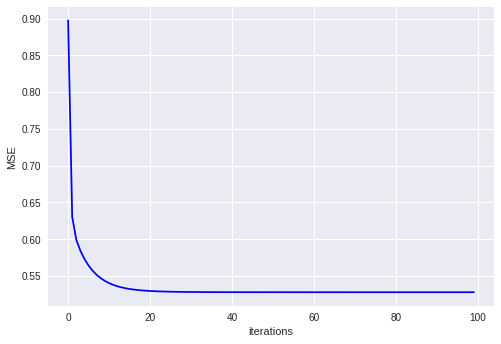

In [ ]:
eta0 = 1e-3
sgd_pipeline = Pipeline([
    ("scaling" , StandardScaler() ),
    ("regressor" , SGDRegressor(max_iter = 1 , tol = -np.infty ,
                                warm_start = True ,  eta0 = eta0, random_state = 42))
])

loss = []
for i in range(100):
  sgd_pipeline.fit(train_x , train_y)
  loss.append(mean_squared_error(train_y , sgd_pipeline.predict(train_x)))

plt.plot(np.arange(len(loss)) , loss , "b-")
plt.xlabel("iterations")
plt.ylabel("MSE")


In [ ]:
# this is an ideal learning curve where the training loss reduces monotonically as the training progresses

In [ ]:
print("iterations before reaching convergence" , sgd_pipeline[-1].n_iter_)
print("no. of weight updates" , sgd_pipeline[-1].t_)

iterations before reaching convergence 1
no. of weight updates 11611.0


In [ ]:
train_mae = mean_absolute_error(train_y , sgd_pipeline.predict(train_x))
dev_mae = mean_absolute_error(tune_y , sgd_pipeline.predict(tune_x))

print("train_mae" , train_mae)
print("tune_mae" , tune_mae)

train_mae 0.5333732983042573
tune_mae 291238114737240.25


In [ ]:
 # alternate ways to fix the learning rate through validation curves

In [ ]:
from sklearn.model_selection import validation_curve
eta0 = [1e-5 , 1e-4 , 1e-3 , 1e-2]
train_scores , test_scores = validation_curve(
    sgd_pipeline, sgd_train_x , sgd_train_y, param_name = "regressor__eta0",
    param_range = eta0 , cv = shuffle_cv , scoring = "neg_mean_squared_error",
    n_jobs = 2
)
train_errors, test_errors = -train_scores , -test_scores

In [ ]:
train_errors

array([[5.4970157 , 5.47418537, 5.45561725, 5.45897979, 5.47585689,
        5.49191576, 5.50467408, 5.46853424, 5.45976827, 5.47144762],
       [4.30425385, 4.28546385, 4.26459393, 4.27506337, 4.28259875,
        4.29616127, 4.31118851, 4.27922324, 4.27646987, 4.2809932 ],
       [0.85589893, 0.85018122, 0.83657382, 0.84864292, 0.83959774,
        0.84994956, 0.85071409, 0.84445808, 0.85800914, 0.84362491],
       [0.66889017, 5.28976551, 0.83655736, 0.94020426, 1.54525895,
        0.99049287, 0.55470573, 0.85670068, 7.67925582, 0.95559332]])

Text(0.5, 1.0, 'validation curve for SGD')

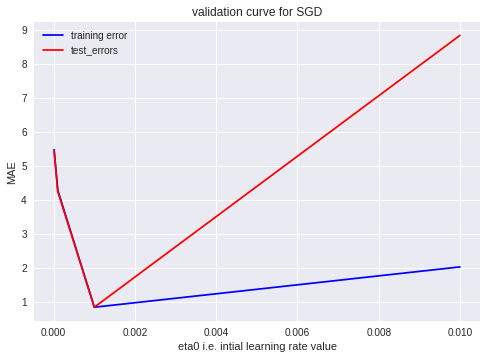

In [ ]:
plt.plot(eta0 , train_errors.mean(axis = 1) , "b-x", label = "training error" )
plt.plot(eta0 , test_errors.mean(axis = 1) , "r-x", label = "test_errors")
plt.legend()
plt.xlabel("eta0 i.e. intial learning rate value")
plt.ylabel("MAE")
plt.title("validation curve for SGD") # we used validation_curve funct

In [ ]:
# for eta0 = 1e-3 the test error is the least hence we select that value as our learning rate


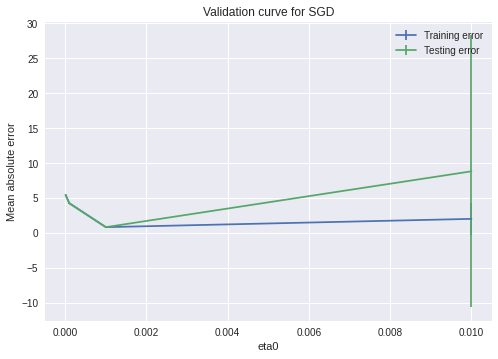

In [ ]:
plt.errorbar(eta0, train_errors.mean(axis=1), yerr=train_errors.std(axis=1), label='Training error')

plt.errorbar(eta0, test_errors.mean(axis=1),yerr=test_errors.std(axis=1), label='Testing error')

plt.legend(loc='best') 
plt.xlabel('eta0')
plt.ylabel('Mean absolute error')
plt.title('Validation curve for SGD')
plt.show()
?plt.errorbar

In [ ]:
"""so, again, it is a very simple process, we have to provide the list of values to be tried.
And then we simply instantiate the validation curve object and gather the training and test
errors and plot them in the on the validation plot. And then fix the value of the hyperparameter where the test error is the lowest.
So, we can use this process in order to setany other hyper parameters.
Not only in case SGDRegressor but any other hyper parameters that we may encounter while
training different machine learning algorithms"""

'so, again, it is a very simple process, we have to provide the list of values to be tried.\nAnd then we simply instantiate the validation curve object and gather the training and test\nerrors and plot them in the on the validation plot. And then fix the value of the hyper\nparameter where the test error is the lowest. So, we can use this process in order to set\nany other hyper parameters.\nNot only in case SGDRegressor but any other hyper parameters that we may encounter while\ntraining different machine learning algorithms'

In [ ]:
#Experimenting with learning rate parameter

In [ ]:
# 1.learning rate parameter = invscaling (which is by default)
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                        early_stopping=True, # in order to set early_stopping criteria we also need validation_fraction
                        validation_fraction=0.2, # so we set aside 20% egs as validation examples
                        eta0=1e-3,                    
                        n_iter_no_change=5, # no. of iteration for which we do not see change greater than the value of tolerance(tol) 
                        tol=1e-3,
                        average=10, # it will start averaging SGD after it sees 10 samples
                        random_state=42))
])

sgd_pipeline.fit(train_x, train_y)

train_mae = mean_absolute_error(train_y, sgd_pipeline.predict(train_x ))

tune_mae = mean_absolute_error(tune_y, sgd_pipeline.predict(tune_x))

print('Train MAE: ', train_mae)
print('Tune MAE: ', tune_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.579376454514559
Tune MAE:  0.5689180241137523

Number of SGD iterations : 7
Number of weight updates :  81271.0


In [ ]:
print("no. of egs in training set :" , train_x.shape[0])
#Number of SGD iterations : 7
#Number of weight updates :  81271.0
print("no. of iterations * no of egs in training set = no of weights update =", train_x.shape[0]*7)

no. of egs in training set : 11610
no. of iterations * no of egs in training set = no of weights update = 81270


In [ ]:
# learning_rate = "constant"
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                         early_stopping=True,
                         eta0=1e-3,
                         tol=1e-3,
                         learning_rate= 'constant',
                         validation_fraction=0.2,
                         n_iter_no_change=5,
                         average=10,
                         random_state=42))
])

sgd_pipeline.fit(train_x, train_y)

train_mae = mean_absolute_error(train_y, sgd_pipeline.predict(train_x ))

tune_mae = mean_absolute_error(tune_y, sgd_pipeline.predict(tune_x))

print('Train MAE: ', train_mae)
print('Tune MAE: ', tune_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.5359339681114987
Tune MAE:  0.5151099728924144

Number of SGD iterations : 8
Number of weight updates :  92881.0


In [ ]:
# learning_rate = "adaptive"

sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                         early_stopping=True,
                         eta0=1e-3, #0.001 i.e. 1 * 10^-3
                         tol=1e-3,
                         learning_rate='adaptive',
                         validation_fraction=0.2,
                         n_iter_no_change=5,
                         average=10,
                         random_state=42))
])

sgd_pipeline.fit(train_x, train_y)

train_mae = mean_absolute_error(train_y, sgd_pipeline.predict(train_x ))

tune_mae = mean_absolute_error(tune_y, sgd_pipeline.predict(tune_x))

print('Train MAE: ', train_mae)
print('Tune MAE: ', tune_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.5340193046836148
Tune MAE:  0.5198356196858102

Number of SGD iterations : 33
Number of weight updates :  383131.0


In [ ]:
'''adaptive learning rate uses the initial learning rate as long as we reach the convergence criteria when
the convergence criteria is reached the learning rate is reduced by dividing the learning rate
by 5 and training continues as long as the convergence criteria is met again. And again
at that the training rate will be reduced further and this will continue unless the
training rate drops below 10 raise to-6.'''

'it uses the initial learning rate as long as we reach the convergence criteria when\nthe convergence criteria is reached the learning rate is reduced by dividing the learning rate\nby 5 and training continues as long as the convergence criteria is met again. And again\nat that the training rate will be reduced further and this will continue unless the\ntraining rate drops below 10 raise to-6.'

In [ ]:
# how to set max_iter(epochs)?
#sgd converges after observing approx 10^6 training egs. thus a reasonable first guess
#for the no. of iterations for n training samples is max_iter = np.ceil(10^6/n)
max_iter = np.ceil(1e6/sgd_train_x.shape[0])
max_iter

65.0

In [ ]:
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=max_iter,
                         early_stopping=True,
                         eta0=1e-3,
                         tol=1e-3,
                         learning_rate='constant',
                         validation_fraction=0.2,
                         n_iter_no_change=5,
                         average=10,
                         random_state=42))
])


sgd_pipeline.fit(train_x, train_y)

train_mae = mean_absolute_error(train_y, sgd_pipeline.predict(train_x ))

tune_mae = mean_absolute_error(tune_y, sgd_pipeline.predict(tune_x))

print('Train MAE: ', train_mae)
print('Tune MAE: ', tune_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.5359339681114987
Tune MAE:  0.5151099728924144

Number of SGD iterations : 8
Number of weight updates :  92881.0


In [ ]:
# graded 1. 

x , y = fetch_california_housing(as_frame = True , return_X_y = True)

train_x , test_x ,train_y , test_y = train_test_split(x , y , shuffle = False
                                                      ,test_size = 0.2 , random_state = 0)

lin_pipeline = Pipeline([
    ("sclaing" , StandardScaler()),
    ("regressor" , LinearRegression())
])
lin_pipeline.fit(train_x , train_y)

test_score = lin_pipeline.score(test_x , test_y)
print("test_score",test_score)


test_score 0.6605140591531992


In [ ]:
lin_pipeline.score?

In [ ]:
test_y[:5]

16512    1.656
16513    1.261
16514    0.944
16515    0.919
16516    1.243
Name: MedHouseVal, dtype: float64

In [ ]:
# 2
from sklearn.metrics import mean_squared_error

predicted_y = lin_pipeline.predict(test_x)

rmse = mean_squared_error(test_y, predicted_y, squared=False)
rmse

0.7033383507521878

In [ ]:
# 3
from sklearn.metrics import explained_variance_score
result = explained_variance_score(test_y , predicted_y)
result

0.6605500501742703

In [ ]:
# 4
from sklearn.metrics import max_error
max_error(test_y , predicted_y)

7.260453292958372

In [ ]:
#5
mean_absolute_error(test_y , predicted_y)

0.5168526993787042

In [ ]:
#6 
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y , predicted_y)

0.49468483563880755

In [ ]:
# 7
sgd_pipeline = Pipeline([
    ("sclaing" , StandardScaler()),
    ("regressor" , SGDRegressor(random_state =0)) 
])
sgd_pipeline.fit(train_x , train_y )
sgd_pipeline[-1].intercept_

array([2.01123921])

In [ ]:
# 8
sgd_pipeline[-1].coef_

array([ 0.84046697,  0.112331  , -0.41213039,  0.21595971, -0.01781887,
       -0.01480892, -0.87394103, -0.83913104])